# 1.1 수학과 파이썬 복습

In [1]:
import numpy as np

x = np.array([1, 2, 3])
x.__class__

numpy.ndarray

In [2]:
x.shape

(3,)

In [3]:
x.ndim

1

In [4]:
W = np.array([[1,2,3], [4,5,6]])
W.shape

(2, 3)

In [5]:
W.ndim

2

## 1.1.2 행렬의 원소별 연산

In [6]:
W = np.array([[1,2,3], [4,5,6]])
X = np.array([[0,1,2], [3,4,5]])

In [7]:
W+X

array([[ 1,  3,  5],
       [ 7,  9, 11]])

In [8]:
W*X 

array([[ 0,  2,  6],
       [12, 20, 30]])

## 1.1.3 브로드캐스트

In [9]:
A = np.array([[1,2], [3,4]])
A*10

array([[10, 20],
       [30, 40]])

In [11]:
A = np.array([[1,2], [3,4]])
b = np.array([10,20])
A*b

array([[10, 40],
       [30, 80]])

## 1.1.4 벡터의 내적과 행렬의 곱

In [12]:
a = np.array([1,2,3])
b = np.array([4,5,6])
np.dot(a,b)

32

In [13]:
A = np.array([[1,2], [3,4]])
B = np.array([[5,6], [7,8]])
np.matmul(A, B)

array([[19, 22],
       [43, 50]])

# 1.2 신경망의 추론
## 1.2.1 신경망 추론 전체 그림

In [15]:
import numpy as np
W1 = np.random.randn(2,4)
b1 = np.random.randn(4)
x = np.random.randn(10, 2)
h = np.matmul(x, W1) + b1

In [16]:
h

array([[ 0.70584835,  1.36108775,  1.49657075, -0.4217229 ],
       [ 2.67087548,  1.57259134,  3.07200901, -1.19195422],
       [ 1.20625282,  1.41101858,  1.91735549, -0.62017228],
       [-1.31329199,  0.84865341,  1.34898226,  0.1965503 ],
       [-0.21903988,  1.67477486, -1.30511283,  0.18329317],
       [ 1.76116234,  1.84796382,  0.48165009, -0.61632786],
       [ 0.52643406,  1.53953095,  0.3668357 , -0.23535541],
       [ 1.1644573 ,  1.54352587,  1.20081192, -0.52339442],
       [-0.85925915,  0.91341245,  1.63378086,  0.02790723],
       [-1.11589139,  0.86701744,  1.52161886,  0.11748349]])

In [17]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [19]:
a = sigmoid(h)
a

array([[0.66948315, 0.79593643, 0.81706246, 0.39610455],
       [0.93528604, 0.82815271, 0.95572326, 0.23290961],
       [0.76963526, 0.80392655, 0.87184325, 0.34974227],
       [0.2119365 , 0.70028459, 0.79396319, 0.54897999],
       [0.44545793, 0.8422114 , 0.21330579, 0.54569543],
       [0.85335518, 0.86388786, 0.61813744, 0.35061708],
       [0.62865103, 0.82339653, 0.59069415, 0.44143125],
       [0.76214169, 0.8239767 , 0.76866919, 0.37205885],
       [0.29749415, 0.71369795, 0.83668692, 0.50697636],
       [0.24677418, 0.70412471, 0.82077674, 0.52933714]])

In [20]:
import numpy as np

def sigmoid(x):
    return 1/(1+np.exp(-x))

x = np.random.randn(10, 2)
W1 = np.random.randn(2, 4)
b1 = np.random.randn(4)
W2 = np.random.randn(4, 3)
b2 = np.random.randn(3)

h = np.matmul(x, W1) + b1
a = sigmoid(h)
s = np.matmul(a, W2) + b2

s


array([[-0.00828559, -3.97832499, -1.24125578],
       [ 1.02443404, -2.67291137, -0.62350323],
       [ 0.69397073, -2.47414414, -0.6536794 ],
       [ 1.15814852, -2.74105204, -0.629839  ],
       [ 1.42279448, -2.87715316, -0.51200074],
       [ 0.98433079, -3.1916547 , -0.87324518],
       [ 1.29900703, -2.71642809, -0.56906826],
       [ 0.3239439 , -2.98915896, -0.63933679],
       [-0.27214266, -3.43205312, -0.69334413],
       [ 0.82015009, -3.41852681, -0.95784849]])

In [35]:
import numpy as np

class Sigmoid:
    def __init__(self):
        self.params = []
        
    def forward(self, x):
        return 1/(1+np.exp(-x))

class Affine:
    def __init__(self, W ,b):
        self.params = [W, b]
        
    def forward(self, x):
        W, b = self.params
        out = np.matmul(x, W) + b
        return out
    
    
class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size):
        I, H, O = input_size, hidden_size, output_size
        
        W1 = np.random.randn(I, H)
        b1 = np.random.randn(H)
        W2 = np.random.randn(H, O)
        b2 = np.random.randn(O)
        
        self.layers = {
            Affine(W1, b1), 
            Sigmoid(),
            Affine(W2, b2)
        }
        
        self.params = []
        for layer in self.layers:
            self.params += layer.params
            
    def predict(self, x):
        for layer in self.layers:
            x = layer.forward(x)
        return x

In [36]:
x = np.random.randn(10, 2)
model = TwoLayerNet(2, 4, 3)
s = model.predict(x)
s

array([[4.65175692e-01, 1.71022149e-02, 8.41058593e-01],
       [6.23577816e-04, 1.21198361e-03, 9.83976502e-01],
       [4.66001312e-01, 1.74487409e-02, 8.42401848e-01],
       [3.55309992e-04, 9.84748161e-04, 9.86712943e-01],
       [1.66158932e-02, 3.28693393e-03, 9.46640480e-01],
       [3.22216375e-02, 5.31270721e-03, 9.41699844e-01],
       [5.90612842e-01, 1.78609514e-02, 8.04065655e-01],
       [9.99999962e-01, 9.03384692e-01, 1.48131150e-02],
       [1.44517561e-01, 8.07163735e-03, 8.93708004e-01],
       [9.14673326e-02, 6.73990412e-03, 9.09663920e-01]])

- Repeat 노드

In [37]:
import numpy as np

D, N = 8, 7
x = np.random.randn(1, D)
y = np.repeat(x, N, axis=0)
dy = np.random.randn(N, D)
dx = np.sum(dy, axis=0, keepdims=True)

- Sum 노드

In [41]:
import numpy as np

D, N = 8, 7
x = np.random.randn(N, D)
y = np.sum(s, axis=0, keepdims=True)

dy = np.random.randn(1, D)
dx = np.repeat(dy, N, axis=0)

- MatMul


In [43]:
class MatMul:
    def __init__(self, W):
        self.params = [W]
        self.grads = [np.zeros_like(W)]
        self.x = None
    
    def forward(self, x):
        W, = self.params
        out = np.matmul(x, W)
        self.x = x

        return out
    
    def backward(self, dout):
        W, = self.params
        dx = np.matmul(dout, W.T)
        dW = np.matmul(self.x.T, dout)
        self.grads[0][...] = dW
        
        return dx

1.3.5 기울기 도출과 역전파 구현
- sigmoid 계층
  

In [45]:
class Sigmoid:
    def __init__(self):
        self.params, self.grads = [], []
        self.out = None

    def forward(self, x):
        out = 1/(1+np.exp(-x))
        self.out = out
        return out
    
    def backward(self, dout):
        dx = dout * (1.0 - self.out) * self.out
        return dx

- Affine 계층

In [46]:
class Affine:
    def __init(self):
        self.params = [W, b]
        self.grads = [np.zeros_like(W), np.zeros_like(b)]
        self.x = None
    
    def forward(self, x):
        W, b = self.params
        out = np.matmul(x, W) + b
        self.x = x
        return out
    
    def backward(self, dout):
        W, b = self.params
        dx = np.matmul(dout, W.T)
        dW = np.matmul(self.x.T, dout)
        db = np.sum(dout, axis=0)
        
        self.grads[0][...] = dW
        self.grads[1][...] = db
        return dx
    
    

## 1.3.6 가중치의 갱신

In [ ]:
class SGD:
    def __init__(self, lr=0.01):
        self.lr = lr
        
    def update(self, params, grads):
        for i in range(len(params)):
            params[i] -= self.lr * grads[i]

# 1.4 신경망으로 문제를 풀다
## 1.4.1 스파이컬 데이터셋

In [47]:
import sys
sys.path.append('..')
from dataset import spiral
import matplotlib.pyplot as plt

x, t = spiral.load_data()
print('x', x.shape)
print('t', t.shape)

x (300, 2)
t (300, 3)


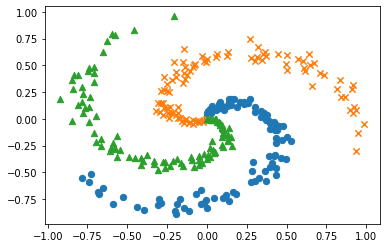

In [48]:
N = 100
CLS_NUM = 3
markers = ["o", "x", "^"]
for i in range(CLS_NUM):
    plt.scatter(
        x[i * N : (i + 1) * N, 0], x[i * N : (i + 1) * N, 1], s=40, marker=markers[i]
    )
plt.show()